
Exploring the World Happiness Report

Last Updated: January 27th, 2025

Daily Challenge: Exploring the World Happiness Report with Matplotlib


👩‍🏫 👩🏿‍🏫 What You’ll learn

    use Matplotlib alongside pandas to analyze
    visualize data from the World Happiness Report
    focus on aspects like happiness scores, economic factors, and regional differences.


🛠️ What you will create

    craft a series of data visualizations using the World Happiness Report dataset
    uncover insights about global happiness trends and influencing factors.


Your Task

Your objective is to delve into the World Happiness Report dataset, which includes columns like Country, Year, Happiness_Score, GDP_per_Capita, Social_Support, Healthy_Life_Expectancy, Freedom_to_Make_Life_Choices, Generosity, and Perceptions_of_Corruption.

    Load and Inspect Data:
        Utilize pandas to load the World Happiness Report Dataset.
        Examine the data to grasp its structure and contents of the year 2019.

    Data Preprocessing:
        Address missing values and adjust data types as necessary.

    Social Support and Happiness:
        Employ a Matplotlib scatter plot to investigate the relationship between ‘Social support’ and ‘Score’.

    Regional Comparisons of GDP and Health:
        Create a Matplotlib subplot that compares ‘GDP per Capita’ and ‘Healthy Life Expectancy’ across different regions.
        Use a bar plot for ‘GDP per Capita’ and a line plot for ‘Healthy Life Expectancy’ on the same axes to observe how economic strength relates to health outcomes in different regions.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall_rank                  156 non-null    int64  
 1   Country_or_region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP_per_capita                156 non-null    float64
 4   Social_support                156 non-null    float64
 5   Healthy_life_expectancy       156 non-null    float64
 6   Freedom_to_make_life_choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions_of_corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None
       Overall_rank       Score  GDP_per_capita  Social_support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.9051

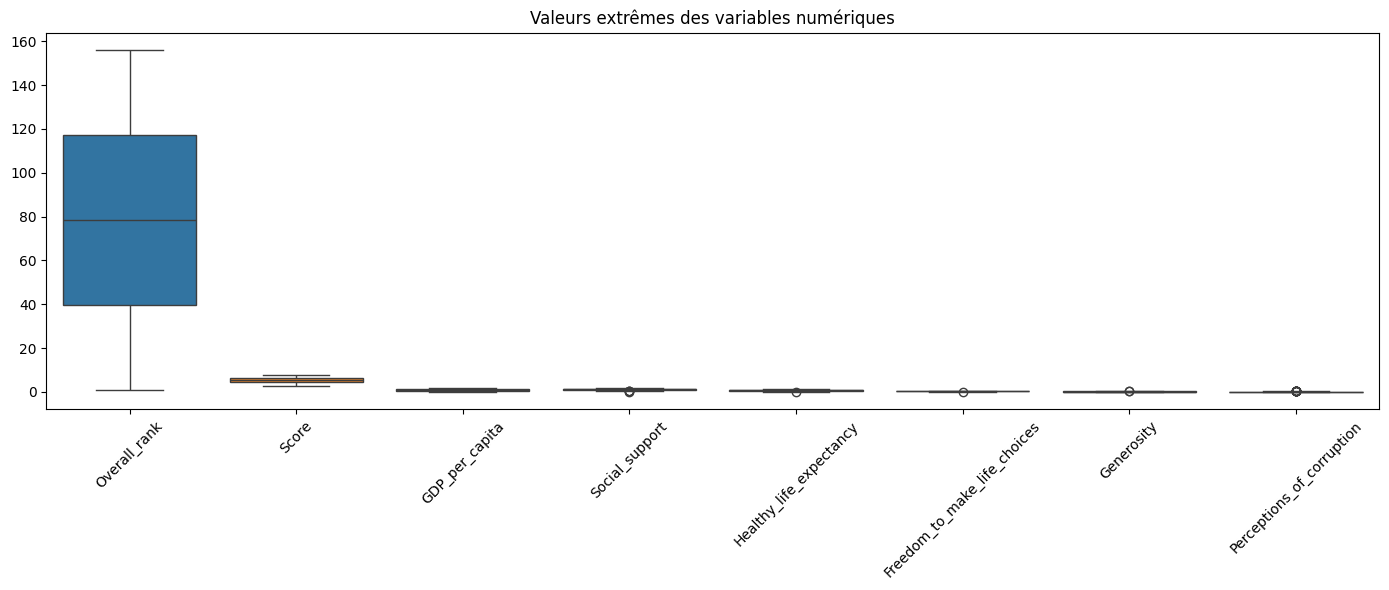

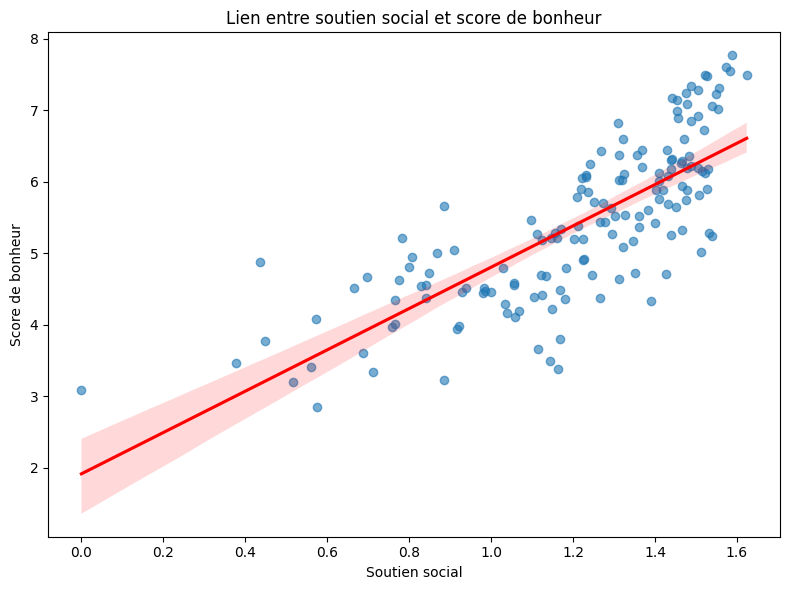

C:\Users\mathi\AppData\Local\Temp\ipykernel_18116\1113954591.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_top['Country_or_region'], rotation=45, ha='right')


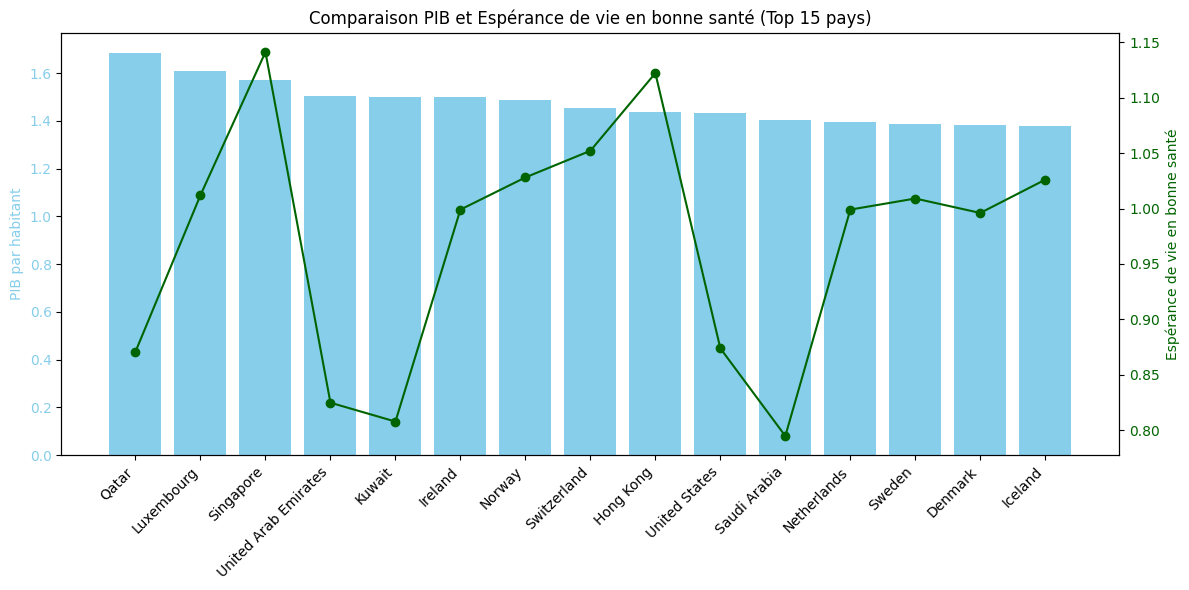

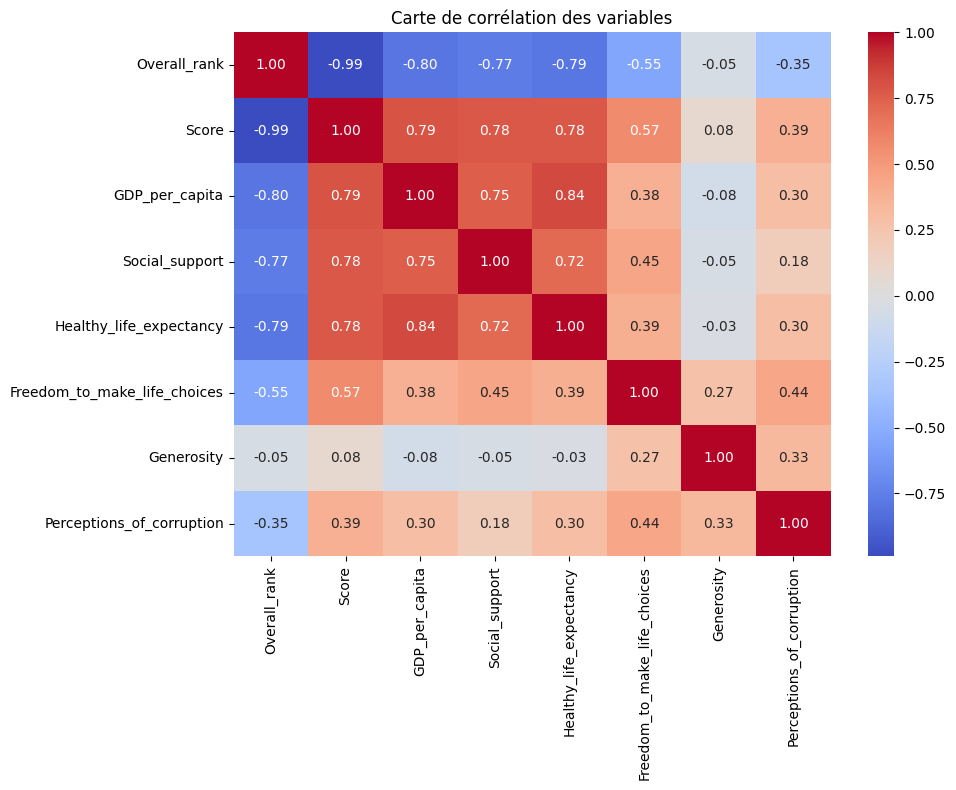

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("2019.csv")
df.columns = [col.strip().replace(" ", "_") for col in df.columns]
print(df.info())
print(df.describe())

# valeurs manquantes
print("\nValeurs manquantes :\n", df.isnull().sum())

# outliers avec boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Valeurs extrêmes des variables numériques")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# scatter plot + régression : Social Support vs Happiness Score
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Social_support', y='Score', scatter_kws={'alpha': 0.6}, line_kws={"color": "red"})
plt.title("Lien entre soutien social et score de bonheur")
plt.xlabel("Soutien social")
plt.ylabel("Score de bonheur")
plt.tight_layout()
plt.show()

# PIB et espérance de vie saine
df_top = df.sort_values(by='GDP_per_capita', ascending=False).head(15)

fig, ax1 = plt.subplots(figsize=(12, 6))

# barres pour le PIB
ax1.bar(df_top['Country_or_region'], df_top['GDP_per_capita'], color='skyblue', label='PIB par habitant')
ax1.set_ylabel("PIB par habitant", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(df_top['Country_or_region'], rotation=45, ha='right')

# ligne pour espérance de vie
ax2 = ax1.twinx()
ax2.plot(df_top['Country_or_region'], df_top['Healthy_life_expectancy'], color='darkgreen', marker='o', label='Espérance de vie en bonne santé')
ax2.set_ylabel("Espérance de vie en bonne santé", color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

plt.title("Comparaison PIB et Espérance de vie en bonne santé (Top 15 pays)")
fig.tight_layout()
plt.show()

# carte de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Carte de corrélation des variables")
plt.tight_layout()
plt.show()